In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data
y = iris.target


In [15]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x2d = pca.fit_transform(X)

print(pca.explained_variance_ratio_)


[0.92461872 0.05306648]


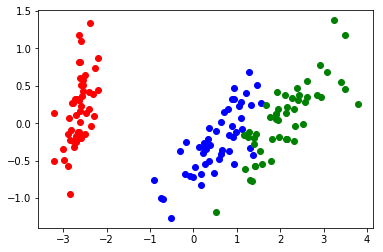

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

x1 = x2d[:,0]
x2 = x2d[:,1]

plt.plot(x1[y==0], x2[y==0],'ro')
plt.plot(x1[y==1], x2[y==1],'bo')
plt.plot(x1[y==2], x2[y==2],'go')

In [16]:
import numpy as np
from sklearn.datasets import fetch_openml

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist)
X, y = mnist['data'], mnist['target']

In [17]:
pca = PCA(n_components=154)
X_mnist_reduced = pca.fit_transform(X)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)


In [19]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_mnist_recovered) / len(X)

0.003124032611259303

In [25]:
# Incremental PCA

from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_mnist_reduced = inc_pca.transform(X)
X_mnist_recovered = inc_pca.inverse_transform(X_mnist_reduced)
mean_squared_error(X, X_mnist_recovered) / len(X)

0.0032402418699135293

In [26]:
inc_pca = IncrementalPCA(n_components=154, batch_size=512)
inc_pca.fit(X)
X_mnist_reduced = inc_pca.transform(X)
X_mnist_recovered = inc_pca.inverse_transform(X_mnist_reduced)
mean_squared_error(X, X_mnist_recovered) / len(X)

0.0032433540404204733

In [ ]:
# Randomized PCA

rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_mnist_reduced = rnd_pca.transform(X)
X_mnist_recovered = rnd_pca.inverse_transform(X_mnist_reduced)
mean_squared_error(X, X_mnist_recovered) / len(X)

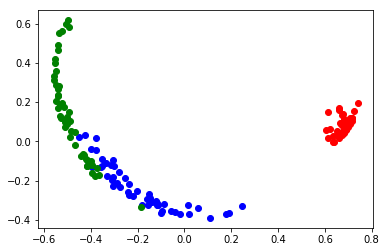

In [43]:
# kernel PCA

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.061111111111111116)

X_reduced = rbf_pca.fit_transform(X)

x1 = X_reduced[:,0]
x2 = X_reduced[:,1]

plt.plot(x1[y==0], x2[y==0],'ro')
plt.plot(x1[y==1], x2[y==1],'bo')
plt.plot(x1[y==2], x2[y==2],'go')


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.05, 0.1, 10),
    'kpca__kernel': ['rbf']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)

grid_search.fit(X,y)

print(grid_search.best_params_)

C:\Users\Han\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Han\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Han\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Han\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Han\Anaconda3\envs\sklearn\lib\site-packages\sklearn\

{'kpca__gamma': 0.061111111111111116, 'kpca__kernel': 'rbf'}


C:\Users\Han\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [36]:
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


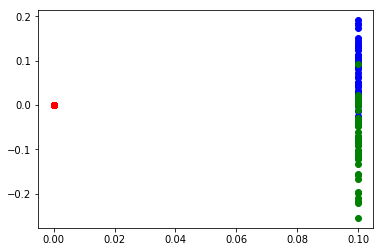

In [39]:
# Locally Linear Embedding

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

X_reduced = lle.fit_transform(X)

x1 = X_reduced[:,0]
x2 = X_reduced[:,1]

plt.plot(x1[y==0], x2[y==0],'ro')
plt.plot(x1[y==1], x2[y==1],'bo')
plt.plot(x1[y==2], x2[y==2],'go')